# <center> Title </center>

## About the Notebook

## The Dataset Description

# Set Up Google Environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
path = '/content/drive/Shareddrives/ML 245/Dataset'

# Loading Libraries

In [ ]:
import pandas as pd
from textblob import TextBlob

# Setting Up Pandas Options


In [ ]:
#Setting Display option for rows & columns
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
pd.set_option('display.min_rows', 5)
pd.set_option('display.expand_frame_repr', True)

# Loading Data

In [ ]:
data = pd.read_csv (path+'/Drug_Dataset.csv', index_col ="uniqueID")


In [ ]:
data.head()

,Table Names,drugName,condition,review,rating,date,usefulCount
uniqueID,,,,,,,
163740,drugsComTest_raw.csv,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2/28/2012,22
206473,drugsComTest_raw.csv,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,5/17/2009,17
159672,drugsComTest_raw.csv,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,9/29/2017,3
39293,drugsComTest_raw.csv,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,3/5/2017,35
97768,drugsComTest_raw.csv,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,10/22/2015,4


# Data Exploration

In [ ]:
data.describe()

,rating,usefulCount
count,215063.000000,215063.000000
mean,6.990008,28.001004
std,3.275554,36.346069
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [ ]:
def describe_cat(data):
    table=pd.DataFrame(columns = data.select_dtypes("object").columns, index = ["count", "nulls","%miss", 'cardinality', "mode", "mode freq", "mode%", "2nd mode", "2nd mode freq", "2nd mode%"])
    for col in data.select_dtypes("object").columns :
        table.loc["count"][col] = len(data[col])
        table.loc["nulls"][col] = len(data[data[col].isna() == True][col])
        table.loc["%miss"][col] = table.loc["nulls"][col]/table.loc["count"][col]
        table.loc["cardinality"][col]= len(data[col].unique())
        table.loc["mode"][col]= data[col].value_counts().index[0]
        table.loc["mode freq"][col]= data[col].value_counts()[0]
        table.loc["mode%"][col]= table.loc["mode freq"][col]/table.loc["count"][col]
        if table.loc["cardinality"][col] != table.loc["mode freq"][col]:
            table.loc["2nd mode"][col]= data[col].value_counts().index[1]
            table.loc["2nd mode freq"][col]= data[col].value_counts()[1]
            table.loc["2nd mode%"][col]= table.loc["2nd mode freq"][col]/table.loc["count"][col]
    return table

In [ ]:
describe_cat(data)

,Table Names,drugName,condition,review,date
count,215063,215063,215063,215063,215063
nulls,0,0,1194,0,0
%miss,0.0,0.0,0.005552,0.0,0.0
cardinality,2,3671,917,128478,3579
mode,drugsComTrain_raw.csv,Levonorgestrel,Birth Control,"""Good""",3/1/2016
mode freq,161297,4930,38436,39,185
mode%,0.749999,0.022924,0.17872,0.000181,0.00086
2nd mode,drugsComTest_raw.csv,Etonogestrel,Depression,"""Good.""",3/31/2016
2nd mode freq,53766,4421,12164,26,183
2nd mode%,0.250001,0.020557,0.05656,0.000121,0.000851


In [ ]:
data.info() # data.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 163740 to 216816
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Table Names  215063 non-null  object
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 13.1+ MB


In [ ]:
# checking if the data contains NULL values
display(data.isnull().any())

Table Names    False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [ ]:
print(len(data.drugName.unique()))

3671


In [ ]:
print(len(data.condition.unique()))

917




```
# This is formatted as code
```

## Distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f283c7fc7d0>,
      dtype=object)

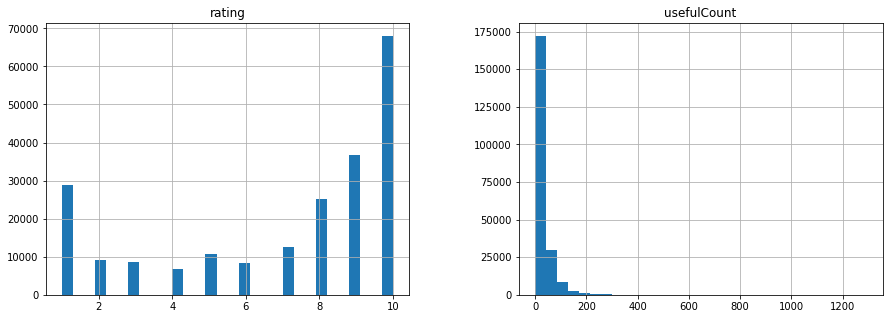

In [ ]:
data.hist(bins=30, figsize=(15, 5))

## Relations among Attributes

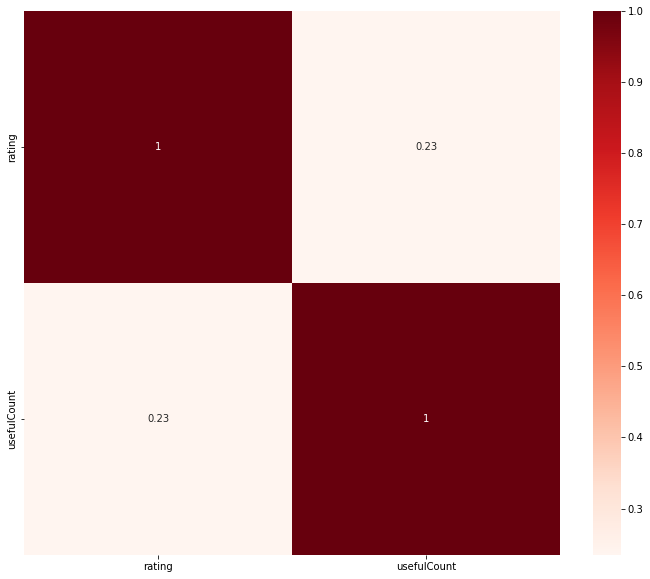

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

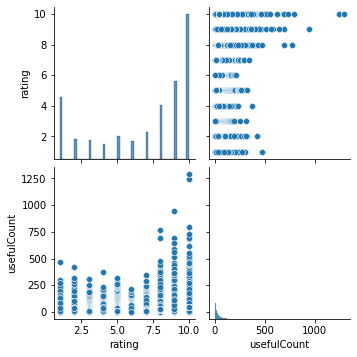

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
data[data["condition"].str.contains("users found this comment helpful.")==True]

,Table Names,drugName,condition,review,rating,date,usefulCount
uniqueID,,,,,,,
33560,drugsComTest_raw.csv,Microgestin Fe 1 / 20,12</span> users found this comment helpful.,"""I was really worried at first because of all ...",9,12/24/2012,12
133232,drugsComTest_raw.csv,Tri-Sprintec,0</span> users found this comment helpful.,"""I have been off of birth control for 2 years....",5,12/20/2011,0
...,...,...,...,...,...,...,...
88459,drugsComTrain_raw.csv,Adderall,21</span> users found this comment helpful.,"""I have been on and off Adderall for the bette...",8,9/30/2010,21
17224,drugsComTrain_raw.csv,Flexeril,23</span> users found this comment helpful.,"""Its the only thing that has really worked to ...",8,5/29/2008,23


# Cleaning Data

### Fill up null values in condition column

In [ ]:
for medic in data[data["condition"].isna()].drugName.unique():
    if len(data[(data["drugName"]==medic)].condition.mode())>0 :
        frequent = data[(data["drugName"]==medic)].condition.mode()[0]
        print(frequent)
        print(len(data.loc[(data["condition"].isna()) & (data["drugName"] == medic), ["condition"]]))
        data.loc[(data["condition"].isna()) & (data["drugName"] == medic), ["condition"]] = frequent
        print(len(data.loc[(data["condition"].isna()) & (data["drugName"] == medic), ["condition"]]))



Weight Loss
2
0
Birth Control
44
0
Birth Control
34
0
ibromyalgia
5
0
Postmenopausal Symptoms
3
0
Obesity
8
0
Birth Control
5
0
Birth Control
108
0
ADHD
10
0
Birth Control
16
0
Birth Control
134
0
Light Sedation
2
0
Vaginal Yeast Infection
1
0
Insomnia
4
0
Bowel Preparation
1
0
Sinusitis
1
0
Bipolar Disorde
2
0
Birth Control
35
0
Conjunctivitis, Allergic
2
0
Migraine Prevention
1
0
Insomnia
2
0
Birth Control
8
0
ibromyalgia
11
0
Underactive Thyroid
2
0
Hyperhidrosis
6
0
ADHD
3
0
Keratoconjunctivitis Sicca
3
0
Birth Control
19
0
Nausea/Vomiting, Chemotherapy Induced
1
0
Constipation, Chronic
1
0
GERD
2
0
Postmenopausal Symptoms
9
0
Pain
6
0
Obsessive Compulsive Disorde
1
0
Bipolar Disorde
11
0
Allergic Rhinitis
2
0
Otitis Media
2
0
Insomnia
6
0
Major Depressive Disorde
2
0
Opiate Dependence
8
0
Insomnia
1
0
ADHD
3
0
Urinary Tract Infection
3
0
Acne
3
0
Cough
1
0
GERD
2
0
ADHD
14
0
Anxiety
7
0
Allergic Rhinitis
1
0
Inflammatory Conditions
1
0
Schizophrenia
2
0
Anxiety
8
0
Seasonal Allerg

## Replace symbols with correpondant character

In [ ]:
# Before replacing the symbol &#039;
data[data["review"].str.contains("&#039;")==True]

,Table Names,drugName,condition,review,rating,date,usefulCount
uniqueID,,,,,,,
163740,drugsComTest_raw.csv,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2/28/2012,22
206473,drugsComTest_raw.csv,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,5/17/2009,17
...,...,...,...,...,...,...,...
194422,drugsComTrain_raw.csv,Crestor,Atherosclerosis,"""I take 10mg and my LDL cholesterol is still 1...",8,1/15/2009,29
216816,drugsComTrain_raw.csv,Rosuvastatin,Atherosclerosis,"""I take 10mg and my LDL cholesterol is still 1...",8,1/15/2009,29


In [ ]:
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = newvalue.replace("&#039;","'")
    data.iloc[i,] = newvalue

IndexError: ignored

In [ ]:
#After Replacing the symbol
data[data["review"].str.contains("&#039;")==True]

In [ ]:
# Before replacing the symbol &amp;
data[data["review"].str.contains("&amp;")==True]

In [ ]:
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = newvalue.replace("&amp;","and")
    data.iloc[i,3] = newvalue

In [ ]:
#After Replacing the symbol &amp;
data[data["review"].str.contains("&amp;")==True]

In [ ]:
for i,row in data[data["review"].str.contains("&")==True].iterrows():
    text = row["review"]

In [ ]:
text

In [ ]:
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = newvalue.replace("&quot;",'"')
    data.iloc[i,3] = newvalue

In [ ]:
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = newvalue.replace("&rsquo;","'")
    data.iloc[i,3] = newvalue

In [ ]:
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = newvalue.replace("&ldquo;",'"')
    data.iloc[i,3] = newvalue

In [ ]:
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = newvalue.replace("&rdquo;",'"')
    data.iloc[i,3] = newvalue

In [ ]:
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = newvalue.replace("&lrm;",'')
    data.iloc[i,3] = newvalue

In [ ]:
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = newvalue.replace("&gt;",'>')
    data.iloc[i,3] = newvalue

In [ ]:
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = newvalue.replace("&pound;",'£')
    data.iloc[i,3] = newvalue

In [ ]:
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = newvalue.replace("&lsquo;","'")
    data.iloc[i,3] = newvalue

In [ ]:
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = newvalue.replace("&ntilde;","n")
    data.iloc[i,3] = newvalue


In [ ]:
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = newvalue.replace("&mdash;","-")
    data.iloc[i,3] = newvalue

In [ ]:
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = newvalue.replace("&hellip;","...")
    data.iloc[i,3] = newvalue

In [ ]:
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = newvalue.replace("&eacute;","é")
    data.iloc[i,3] = newvalue

In [ ]:
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = newvalue.replace("&lt;","<")
    data.iloc[i,3] = newvalue

In [ ]:
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = newvalue.replace("&deg;"," degrees")
    data.iloc[i,3] = newvalue

In [ ]:
data[data["review"].str.contains("&")==True]

,Table Names,drugName,condition,review,rating,date,usefulCount
uniqueID,,,,,,,
163740,drugsComTest_raw.csv,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2/28/2012,22
206473,drugsComTest_raw.csv,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,5/17/2009,17
...,...,...,...,...,...,...,...
194422,drugsComTrain_raw.csv,Crestor,Atherosclerosis,"""I take 10mg and my LDL cholesterol is still 1...",8,1/15/2009,29
216816,drugsComTrain_raw.csv,Rosuvastatin,Atherosclerosis,"""I take 10mg and my LDL cholesterol is still 1...",8,1/15/2009,29


## Step

In [ ]:
for line in data.iterrows():
    feedback = line[1].values[3]
    blob = TextBlob(feedback)
    data.loc[data.uniqueID == line[1].values[0],"blob"]  = blob.sentiment[0]

AttributeError: ignored

In [ ]:
data.loc[1,"review"]

In [ ]:
data.head(50)

In [ ]:
data["condition"].value_counts()

# Stemming and lemmatization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

porter=PorterStemmer()


example1 = "Hello world, how are you. Did you know that the weather is beautiful outside ? \
            I am going to go out and walk in the rain !"

def remove_stop_words_punc (text, stop_words):
    words= text.split
    list_words = [w for w in word_tokenize(text) if not w in stop_words]
    recons_text = " ".join(list_words)
    recons_text = recons_text.translate(str.maketrans("","", string.punctuation))
    recons_text = "".join([i for i in recons_text if not i.isdigit()])
    while "  " in recons_text :
        recons_text = recons_text.replace("  ", " ")
    return recons_text

def stemming(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [ ]:
import numpy as np

In [ ]:
stop_words = set(stopwords.words('english'))
data["new_review"] = np.NaN
for i, row in data.iterrows():
    newvalue = row["review"]
    newvalue = stemming(remove_stop_words_punc(newvalue, stop_words))
    data.iloc[i,7] = newvalue
stemming(remove_stop_words_punc(example1, stop_words))

In [ ]:
data

In [ ]:
for line in data.iterrows():
    feedback = line[1].values[7]
    blob = TextBlob(feedback)
    data.loc[data.uniqueID == line[1].values[0],"blob"]  = blob.sentiment[0]

In [ ]:
data.head(50)

In [ ]:
sample_data= data.sample(frac=0.2)
len(data)
#len(sample_data)

# NLTK

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords



In [ ]:
# nltk.download()
# then downloaded all libraries

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
example1 = "Hello world, how are you. Did you know that the waether is beautiful outside ? \
            I am going to go out and walk in the rain !"
print(sent_tokenize(example))
print(word_tokenize(example))

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


example2= "This is an excelent idea ! You are awsome!"
stop_words = set(stopwords.words('english'))
print(stop_words)

In [ ]:
print([w for w in word_tokenize(example2) if not w in stop_words])

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
ps_example = PorterStemmer()

In [ ]:
example3 = ['served', "server", "service", "serving"]
print(ps_example.stem(w) for w in example3 )

In [ ]:
for w in example3:
    print(ps_example.stem(w) )

# Another way

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
import glob
import json


In [ ]:
def remove_stop_words (text, stop_words):
    words= text.split
    list_words = [w for w in word_tokenize(text) if not w in stop_words]
    #or
    #for w in word_tokenize(text):
    #    if not w in stop_words:
    #        list_words.append(w)
    recons_text = " ".join(list_words)
    recons_text = recons_text.translate(str.maketrans("","", string.punctuation))
    recons_text = "".join([i for i in recons_text if not i.isdigit()])
    while "  " in recons_text :
        recons_text = recons_text.replace("  ", " ")
    return recons_text

In [ ]:
vectorizer = TfidfVectorizer(
                            lowercase = True,
                            max_features = 100,
                            max_df = 0.8,
                            min_df = 5,
                            ngram_range = (1,3),
                            stop_words = "english"
)

vectors = vectorizer.fit_transform(cleaned_reviews)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()

all_keywords = []

for description in denselist :
    x= 0
    keywords = []
    for word in description:
        if word>0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)

In [ ]:
true_k = 20
model = KMeans(n_clusters = true_k, init="k-means++", max_iter = 100, n_init=1)
model.fit(vectors)
order_controls=model.cluster_centers.argsort()[:,::1]
terms = vectorizer.get_feature_names()